In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%run moudle/pre_process
%run moudle/segment_resume



Populating the interactive namespace from numpy and matplotlib


In [2]:

src_data=open("data/customer.json")
corpus=src_data.read().split('\n')

num=5000

experiences=[]
for item in corpus[num*3:num*4]:
    resume=resume_vec_all(item)
    if resume:
        experiences.append(resume[0])
experience_df=pd.DataFrame(experiences)




In [3]:

ex_list=experience_df[0]
                                    # .loc[(experience_df[4]>40)][0].values
experiences=list(ex_list)
                                # for ex in experiences:
                        #     print ex
print len(experiences)

4984


In [4]:
# %time
exp_seg=[]
# for exp in experiences:
%time [exp_seg.append(text_segment(exp,20)) for exp in experiences]
#     exp_seg.append(text_cut(exp))
    

print "segment"

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/05/qgxy3zyx40jflp070rrvt8x80000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/05/qgxy3zyx40jflp070rrvt8x80000gn/T/jieba.cache
Loading model cost 0.567 seconds.
DEBUG:jieba:Loading model cost 0.567 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


CPU times: user 30.8 s, sys: 533 ms, total: 31.3 s
Wall time: 31.7 s
segment


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
%time vectorizer = TfidfVectorizer(min_df=0.001,max_df=0.3, decode_error='ignore')
X = vectorizer.fit_transform(exp_seg)
X=X.toarray()

print X.shape
print len(exp_seg)


CPU times: user 36 µs, sys: 1 µs, total: 37 µs
Wall time: 42 µs
(4984, 1771)
4984


In [6]:
# for i in vectorizer.get_feature_names():
#     print i 


In [35]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_vectorizer = CountVectorizer(min_df=1)
# count_X = count_vectorizer.fit_transform(corpus)
# print count_X.shape

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


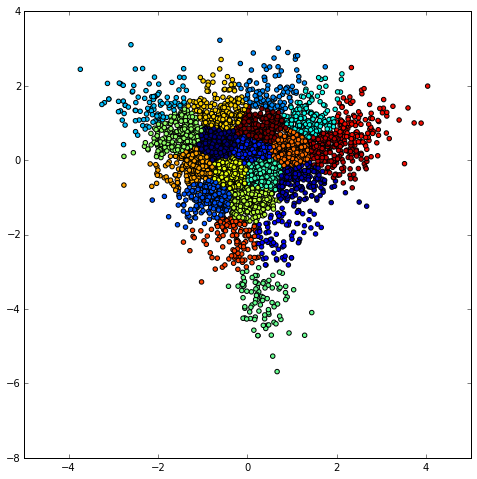

In [7]:
num_clusters=20
km = KMeans(n_clusters=num_clusters, random_state=3)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
pca=PCA(n_components=2,whiten=True)
pca_X=pca.fit_transform(X)

plt.figure(figsize=(8, 8))
pca_Y= km.fit_predict(pca_X)
scatter(pca_X[:, 0], pca_X[:, 1], c=pca_Y)

In [10]:
num_clusters=10
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters, random_state=3)
clustered = km.fit(X)


word_list=vectorizer.get_feature_names()
length=X.shape[1]  


def get_key_words(matrix,i,min_df):
    key_words=""
    select=matrix[i]>min_df
    for idx in np.arange(length)[select]:
        key_words=key_words+word_list[idx]+" "
    print key_words
    
    
for i in range(num_clusters):
    get_key_words(km.cluster_centers_,i,0.02)

CPU times: user 26.5 s, sys: 221 ms, total: 26.7 s
Wall time: 15.7 s


In [12]:

for i in range(10):
    index=(km.labels_==i).nonzero()
    out=open("../resume"+str(i)+".txt","w+")
    for idx in index[0][:5]:
        out.write( experiences[idx])
        print "-"*10
        print experiences[idx]


UnicodeEncodeError: 'ascii' codec can't encode characters in position 0-15: ordinal not in range(128)

In [ ]:
# for i in range(num_clusters): 
#     index=(km.labels_==i).nonzero()
#     print len (index[0])